In [254]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [255]:
color_palette = {
    'region': ['Berner-Mitelland', 'Berner-Oberland', 'Freiburg-Neuenburg-Jura', 'Graubuenden', 'Nordwestschweiz', 'Ostschweiz', 'Tessin', 'Waadt-Genfersee', 'Wallis', 'Zentralschweiz', 'Zuerich'],
    'color': ['#5188AD', '#E9D797', '#CAA2C0' , '#8B76B4', '#EEA760', '#E26D64', '#B65278', '#A6CAEC', '#619589', '#AC9186', '#809668']
}

In [256]:
df_camping_clean = pd.read_csv('camping_clean.csv', encoding='utf-8')
df_camping_clean

,Name,Ortschaft,Latitude,Longitude,Touristenstellplätze,weiter Unterküfte,kleiner Platz (<80 m2),mittlerer Platz (~100 m2),grosser Platz (>110 m2),Stellplatz am Wasser,...,Region Wallis,Region Zentralschweiz,Region Zuerich,Hauptsaison,Nebensaison,Wandern,Strandzugang,Aktivitäten,Bahnhof,Busstation
0,Camping Gravas,7078 Lenzerheide (GR),46.722760,9.555440,35.0,1,1,0,0,0,...,0,0,0,1,0,1,1,8,0,1
1,Camping Gravas,7078 Lenzerheide (GR),46.722760,9.555440,35.0,1,0,1,0,0,...,0,0,0,1,0,1,1,8,0,1
2,Camping Gravas,7078 Lenzerheide (GR),46.722760,9.555440,35.0,1,1,0,0,0,...,0,0,0,0,1,1,1,8,0,1
3,Camping Gravas,7078 Lenzerheide (GR),46.722760,9.555440,35.0,1,0,1,0,0,...,0,0,0,0,1,1,1,8,0,1
4,Camping St. Cassian,7083 Lenz b. Lenzerheide (GR),46.698692,9.558404,70.0,1,1,0,0,0,...,0,0,0,1,0,1,0,7,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801,Lindenhof,ch-2572 Sutz-Lattrigen (BE),47.093373,7.210469,50.0,0,1,0,0,0,...,0,0,0,1,1,0,1,7,0,0
802,Lindenhof,ch-2572 Sutz-Lattrigen (BE),47.093373,7.210469,50.0,0,0,1,0,0,...,0,0,0,1,1,0,1,7,0,0
803,Seeland Camp,2554 Meinisberg (BE),47.162189,7.346157,25.0,0,1,0,0,0,...,0,0,0,0,1,0,0,5,1,1
804,Seeland Camp,2554 Meinisberg (BE),47.162189,7.346157,25.0,0,1,0,0,0,...,0,0,0,1,0,0,0,5,1,1


## abhängige Variabel (Preis)

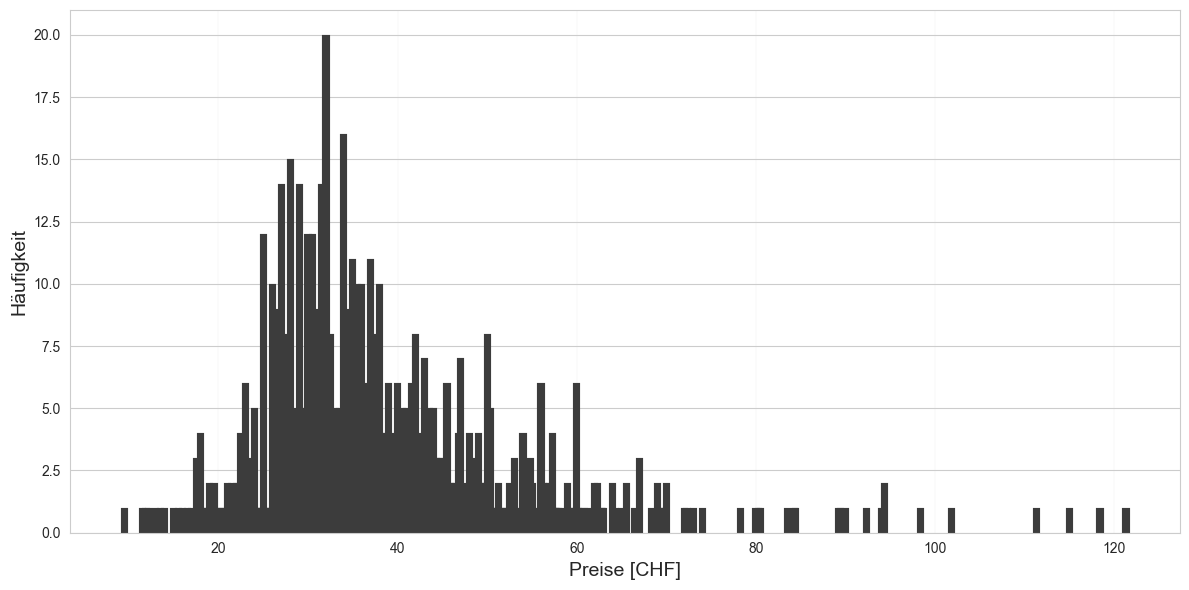

In [257]:
# Preise
value_counts = df_camping_clean['Preis'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(12, 6))

# Balken plotten
ax.bar(value_counts.index, value_counts.values, color='#3C3C3C', edgecolor='#3C3C3C', linewidth=0.1)

# Achsenbeschriftungen und Titel hinzufügen
ax.set_ylabel('Häufigkeit', fontsize=14)
ax.set_xlabel('Preise [CHF]', fontsize=14)

ax.grid(which='both', axis='x', linestyle='-', linewidth=0.1, color='lightgray')  # Nur horizontale Linien behalten

plt.tight_layout()
plt.show()

In [258]:
df_camping_clean['Preis'].describe()

count    806.000000
mean      38.606638
std       14.505226
min        9.500000
25%       29.325000
50%       35.330000
75%       44.750000
max      121.300000
Name: Preis, dtype: float64

## unabhängige Variabeln

### Saison

C:\Users\sarak\AppData\Local\Temp\ipykernel_5444\2936542706.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_saison['schlussel'] = df_saison.apply(create_key, axis=1)


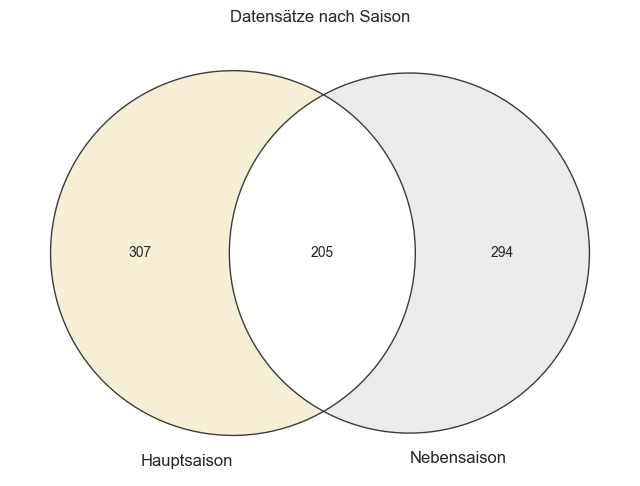

In [259]:
# Saison
from matplotlib_venn import venn2, venn2_circles

# Teildataframe
df_saison = df_camping_clean[['Name', 'Preis', 'Hauptsaison', 'Nebensaison']]


# Funktion zur Erstellung des Schlüssels
def create_key(row):
    return f"{row['Name']}_{row['Preis']}_{row['Hauptsaison']}"


# Neue Spalte 'schluessel' erstellen für Eineindeutigkeit
df_saison['schlussel'] = df_saison.apply(create_key, axis=1)

# Sets erstellen
hauptsaison = set(df_saison[df_saison['Hauptsaison'] == 1]['schlussel'])
nebensaison = set(df_saison[df_saison['Nebensaison'] == 1]['schlussel'])

# Erstelle das Venn-Diagramm
plt.figure(figsize=(8, 8))
venn2([hauptsaison, nebensaison], set_labels=('Hauptsaison', 'Nebensaison'), set_colors=('#E9D797', '#CFCFCF'))
venn2_circles([hauptsaison, nebensaison], color='#3C3C3C', linewidth=1)

# Titel hinzufügen
plt.title('Datensätze nach Saison')

# ZDiagramm anzeigen
plt.show()

### Öffnungszeiten in Prozent

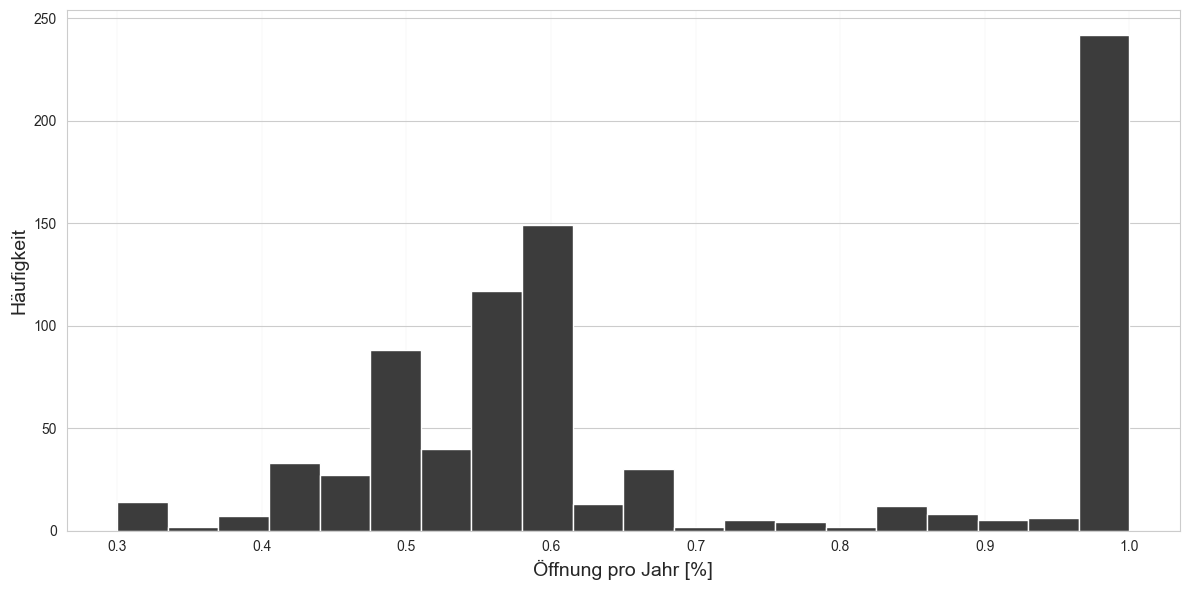

In [260]:
# Öffnungszeiten in Prozent
fig, ax = plt.subplots(figsize=(12, 6))

ax.hist(df_camping_clean['Öffnungszeit[%]'],
        bins=20,
        color='#3C3C3C')

# Achsenbeschriftungen und Titel hinzufügen
ax.set_ylabel('Häufigkeit', fontsize=14)
ax.set_xlabel('Öffnung pro Jahr [%]', fontsize=14)

ax.grid(which='both', axis='x', linestyle='-', linewidth=0.1, color='lightgray')  # Nur horizontale Linien behalten

plt.tight_layout()
plt.show()

### Aktivitäten

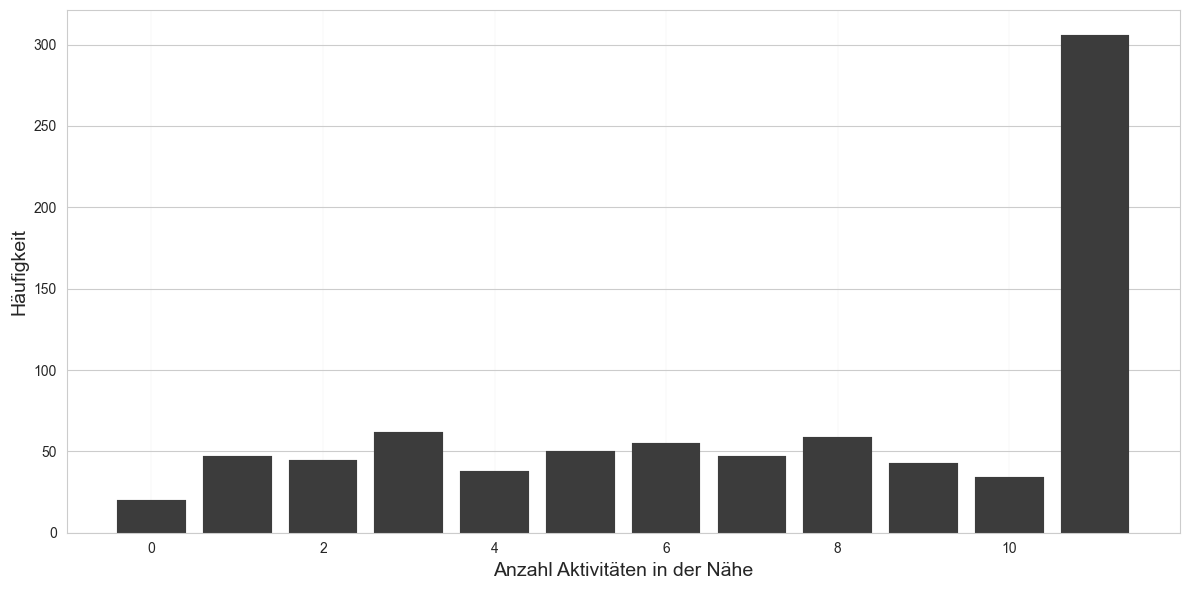

In [261]:
# Aktivitäten
value_counts = df_camping_clean['Aktivitäten'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(12, 6))

# Balken plotten
ax.bar(value_counts.index, value_counts.values, color='#3C3C3C', edgecolor='#3C3C3C', linewidth=0.1)

# Achsenbeschriftungen und Titel hinzufügen
ax.set_ylabel('Häufigkeit', fontsize=14)
ax.set_xlabel('Anzahl Aktivitäten in der Nähe', fontsize=14)

ax.grid(which='both', axis='x', linestyle='-', linewidth=0.1, color='lightgray')  # Nur horizontale Linien behalten

plt.tight_layout()
plt.show()

### Region

In [262]:
import folium

df_camping_map = df_camping_clean[['Name', 'Latitude', 'Longitude', 'Region']].drop_duplicates(subset=['Name'])

# Eine Folium-Karte erstellen
m = folium.Map(location=[df_camping_map['Latitude'].mean(), df_camping_map['Longitude'].mean()],tiles='Cartodb Positron', zoom_start=8.2,)

# Punkte auf die Karte hinzufügen
for idx, row in df_camping_map.iterrows():
    if row['Region'] in color_palette['region']:
        color = color_palette['color'][color_palette['region'].index(row['Region'])]
    else:
        color = '#CCCCCC'

    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=2,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=1,
        #popup=row['Name']

    ).add_to(m)

# anzeigen
display(m)

### Anzahl Einträge pro Region

In [263]:
df_region = df_camping_clean[['Region Berner-Mitelland', 'Region Berner-Oberland', 'Region Freiburg-Neuenburg-Jura', 'Region Graubuenden', 'Region Nordwestschweiz', 'Region Ostschweiz', 'Region Tessin', 'Region Waadt-Genfersee', 'Region Wallis', 'Region Zentralschweiz', 'Region Zuerich']]
df_region

,Region Berner-Mitelland,Region Berner-Oberland,Region Freiburg-Neuenburg-Jura,Region Graubuenden,Region Nordwestschweiz,Region Ostschweiz,Region Tessin,Region Waadt-Genfersee,Region Wallis,Region Zentralschweiz,Region Zuerich
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
801,1,0,0,0,0,0,0,0,0,0,0
802,1,0,0,0,0,0,0,0,0,0,0
803,1,0,0,0,0,0,0,0,0,0,0
804,1,0,0,0,0,0,0,0,0,0,0


In [264]:
color_palette = {
    'region': ['Region Berner-Mitelland', 'Region Berner-Oberland', 'Region Freiburg-Neuenburg-Jura', 'Region Graubuenden', 'Region Nordwestschweiz', 'Region Ostschweiz', 'Region Tessin', 'Region Waadt-Genfersee', 'Region Wallis', 'Region Zentralschweiz', 'Region Zuerich'],
    'color': ['#5188AD', '#E9D797', '#CAA2C0' , '#8B76B4', '#EEA760', '#E26D64', '#B65278', '#A6CAEC', '#619589', '#AC9186', '#809668']
}


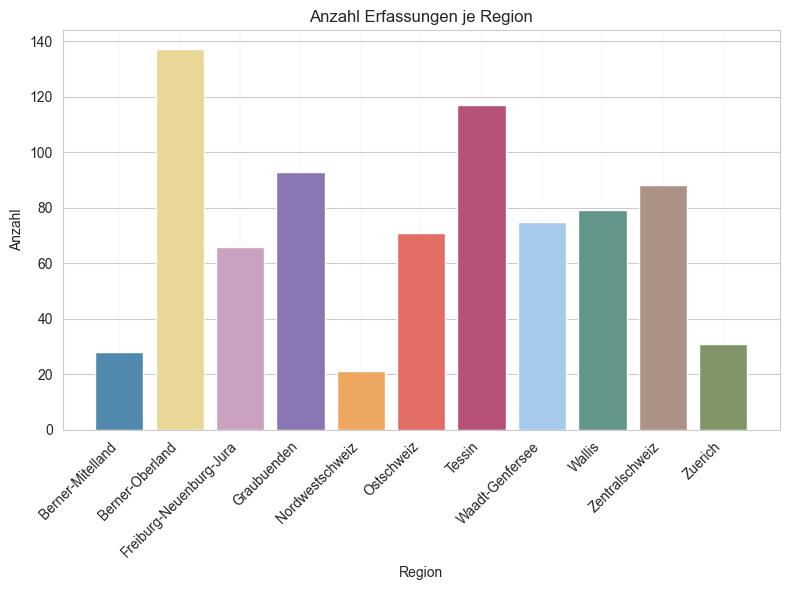

In [265]:
# Anzahl Einträge
fig, ax = plt.subplots(figsize=(8, 6))

# Schleife über jede Spalte im DataFrame
for i, col in enumerate(df_region.columns):
    values = df_region[col].values
    region = col

    # Farbe abrufen
    if region in color_palette['region']:
        color = color_palette['color'][color_palette['region'].index(region)]
    else:
        color = '#CCCCCC'

    # Höhe der Säule
    ax.bar(i, sum(values), color=color)

# Achsenbeschriftungen und Titel hinzufügen
ax.set_ylabel('Anzahl')
ax.set_xlabel('Region')
ax.set_title('Anzahl Erfassungen je Region')

xticklabels = [col[7:] for col in df_region.columns]
ax.set_xticks(range(len(df_region.columns)))
ax.set_xticklabels(xticklabels, rotation=45, ha='right')

# Vertikale Hilfslinien ausschalten
ax.grid(which='major', axis='x', linestyle='-', linewidth=0.1, color='lightgray')  # Nur horizontale Linien behalten

plt.tight_layout()
plt.show()


### Grösse Campingplatz / Touristenplätze

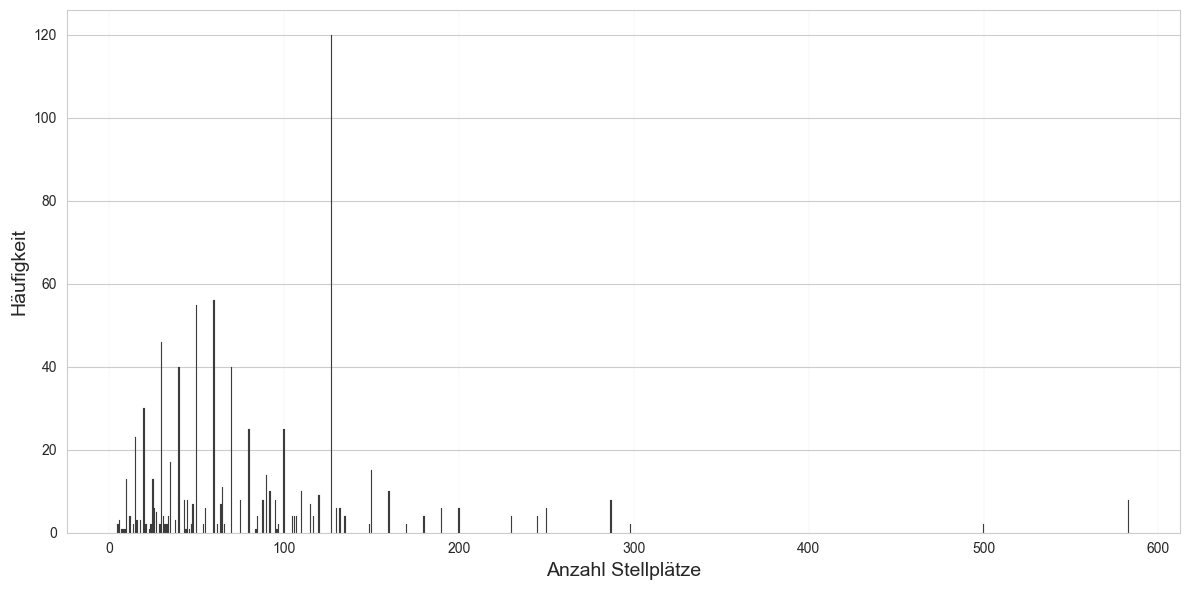

In [266]:
# Grösse des Campingplatzes (Touristenplätze)
value_counts = df_camping_clean['Touristenstellplätze'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(12, 6))

# Balken plotten
ax.bar(value_counts.index, value_counts.values, color='#3C3C3C', edgecolor='#3C3C3C', linewidth=0.1)

# Achsenbeschriftungen und Titel hinzufügen
ax.set_ylabel('Häufigkeit', fontsize=14)
ax.set_xlabel('Anzahl Stellplätze', fontsize=14)

ax.grid(which='both', axis='x', linestyle='-', linewidth=0.1, color='lightgray')  # Nur horizontale Linien behalten

plt.tight_layout()
plt.show()

#-> 120 Mal sind die Anzahl Stellplätze 127

In [267]:
df_camping_clean['Touristenstellplätze'].describe()

count    806.000000
mean      85.857320
std       76.509364
min        5.000000
25%       40.000000
50%       68.000000
75%      127.000000
max      583.000000
Name: Touristenstellplätze, dtype: float64

### Grösse der Stellplätze

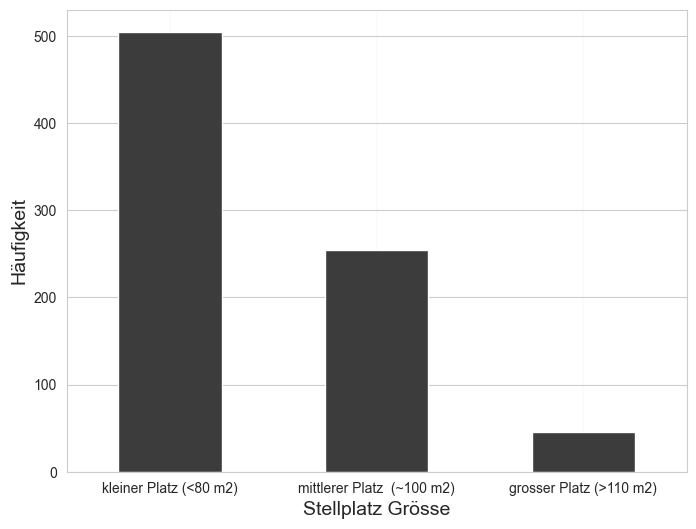

In [268]:
# Stellplatzgrösse
df_stellplatz_groesse =df_camping_clean[['kleiner Platz (<80 m2)', 'mittlerer Platz  (~100 m2)', 'grosser Platz (>110 m2)']]

# Berechnung der Summen
sums = df_stellplatz_groesse.sum()

# Balkendiagramm
fig, ax = plt.subplots(figsize=(8, 6))
sums.plot(kind='bar',color='#3C3C3C', ax=ax)

plt.xlabel('Stellplatz Grösse', fontsize=14)
plt.ylabel('Häufigkeit', fontsize=14)
plt.xticks(rotation=0)

# Füge das Gitter hinzu
ax.grid(which='both', axis='x', linestyle='-', linewidth=0.1, color='lightgray')

# Zeige das Diagramm an
plt.show()

### Sterne Kategorie

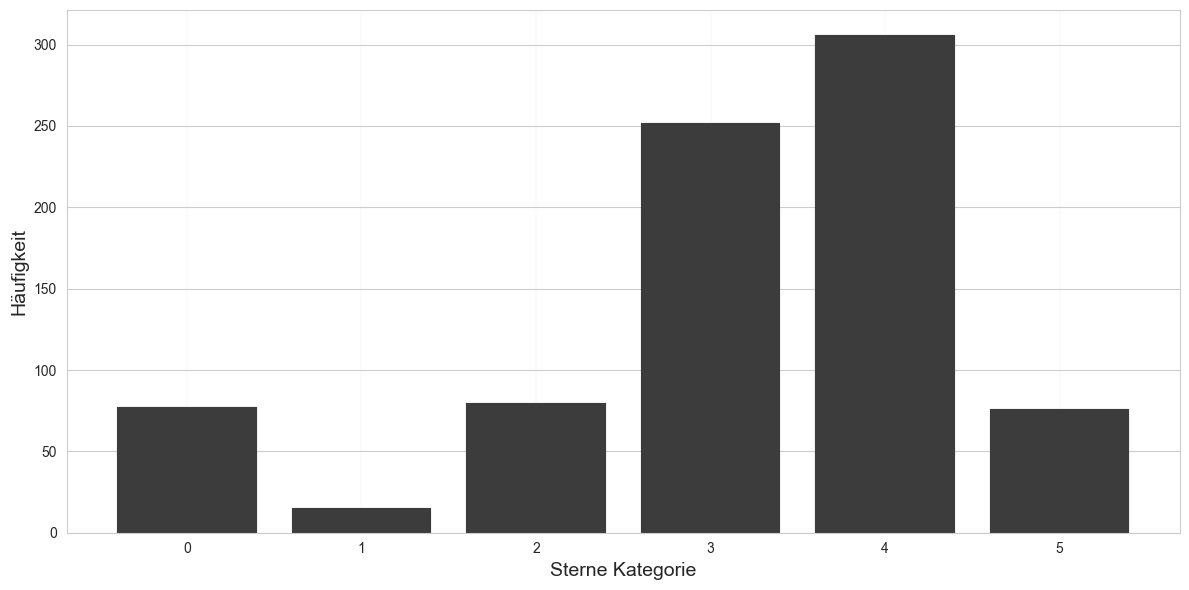

In [269]:
# Bewertung (Sterne)
value_counts = df_camping_clean['Sternebewertung'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(12, 6))

# Balken plotten
ax.bar(value_counts.index, value_counts.values, color='#3C3C3C', edgecolor='#3C3C3C', linewidth=0.1)

# Achsenbeschriftungen und Titel hinzufügen
ax.set_ylabel('Häufigkeit', fontsize=14)
ax.set_xlabel('Sterne Kategorie', fontsize=14)

ax.grid(which='both', axis='x', linestyle='-', linewidth=0.1, color='lightgray')  # Nur horizontale Linien behalten

plt.tight_layout()
plt.show()

### Anzahl Mitgliedschaften

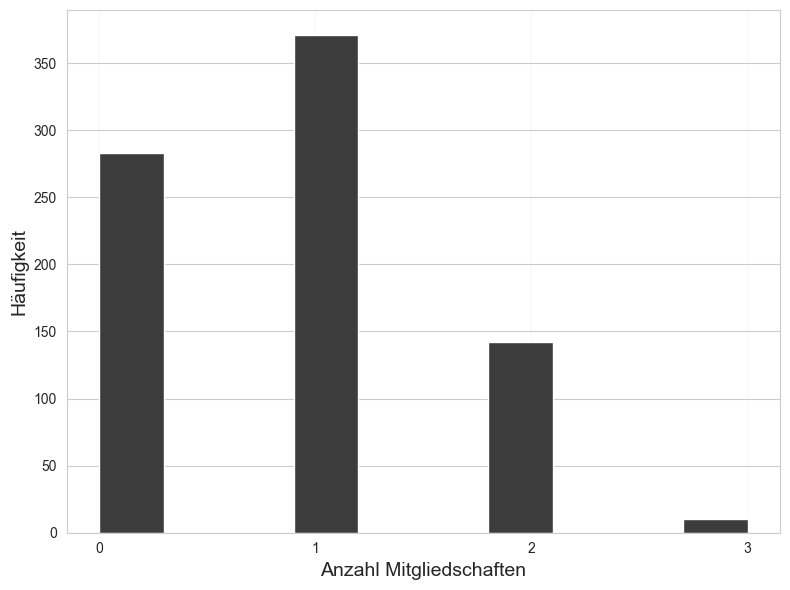

In [270]:
import matplotlib.ticker as ticker
# Mitgliedschaften
fig, ax = plt.subplots(figsize=(8, 6))

ax.hist(df_camping_clean['Mitgliedschaften'], color='#3C3C3C')

# Achsenbeschriftungen und Titel hinzufügen
ax.set_ylabel('Häufigkeit', fontsize=14)
ax.set_xlabel('Anzahl Mitgliedschaften', fontsize=14)

ax.grid(which='both', axis='x', linestyle='-', linewidth=0.1, color='lightgray')  # Nur horizontale Linien behalten
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.tight_layout()
plt.show()

In [271]:
df_camping_clean['Mitgliedschaften'].describe()

count    806.000000
mean       0.849876
std        0.745033
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: Mitgliedschaften, dtype: float64

### Plot für binäre Werte (-> alle in einem)

In [272]:
df_biaer = df_camping_clean[['weiter Unterküfte',  'Stellplatz am Wasser', 'Behindertengerechter Zugang', 'Haustierfreundlichkeit','Waschmaschine und Trockner', 'Aufenthaltsraum', 'Gemeinschaftsküche', 'Grillplatz','Gastronomie', 'Shop', 'Hallenbad', 'Freibad', 'Bademöglichkeit', 'Babypool', 'Sportplatz', 'Golf', 'Tennis', 'Disco', 'Wifi', 'Spielplatz', 'Unterhaltungsprogramm', 'Bootsvermietung', 'Fahrradvermietung','Informationsstelle','Wandern', 'Strandzugang', 'Bahnhof', 'Busstation']]

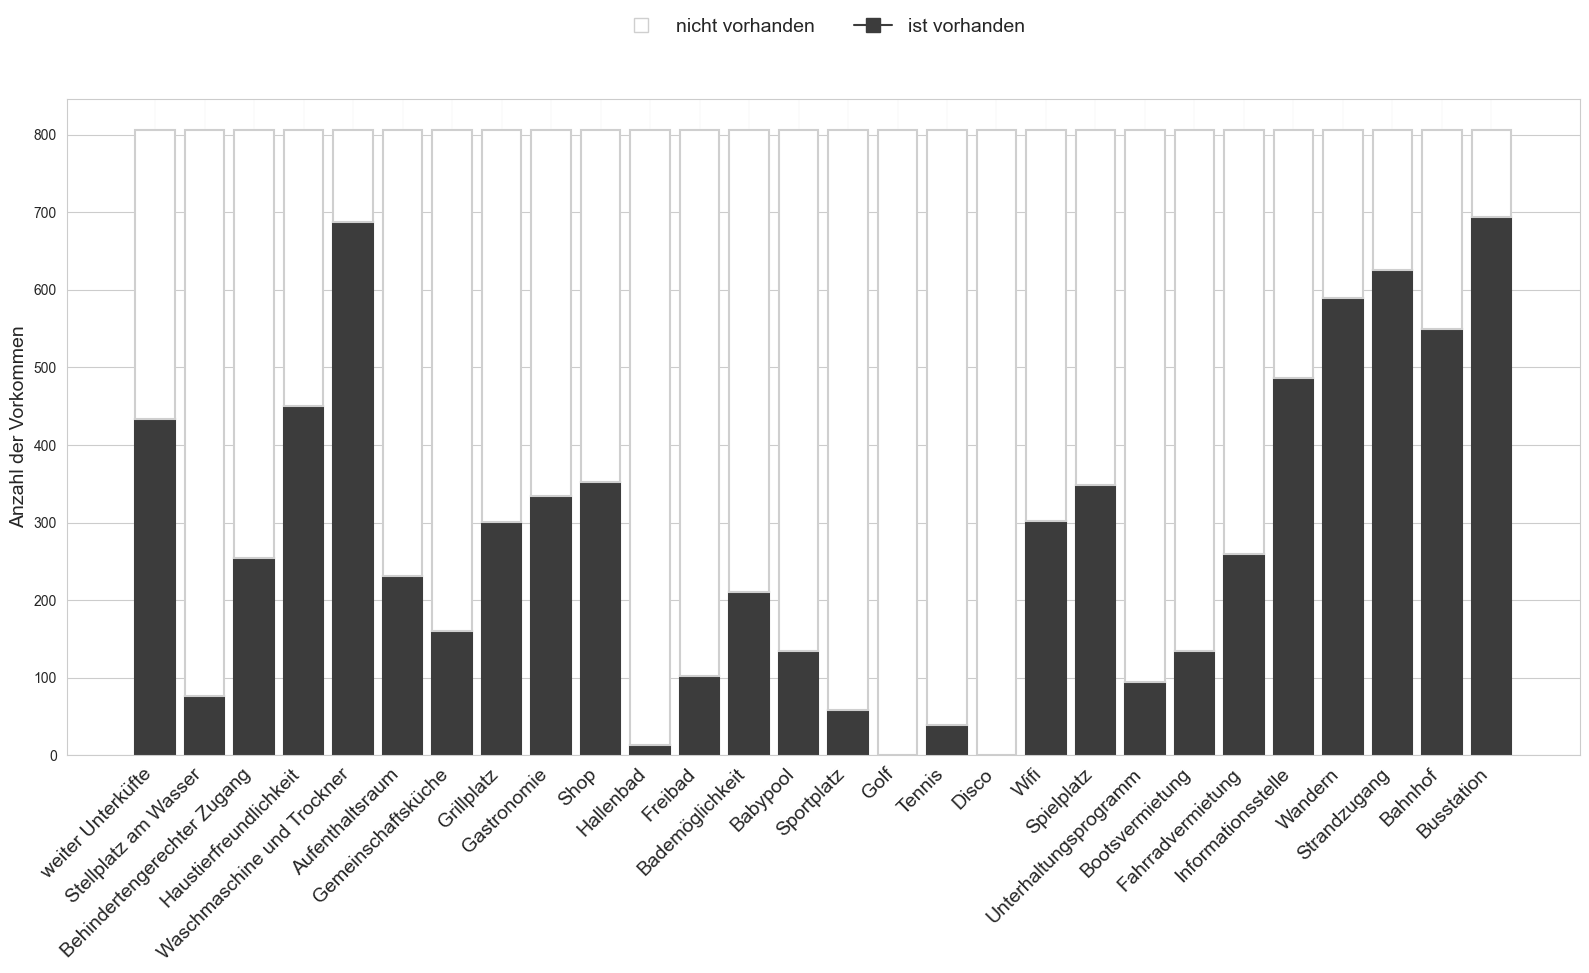

In [273]:
import matplotlib.pyplot as plt

# Gestapeltes Säulendiagramm erstellen
fig, ax = plt.subplots(figsize=(16, 10))

# Anzahl der Zeilen im DataFrame
num_rows = len(df_biaer)

# Schleife über jede Spalte im DataFrame
for i, col in enumerate(df_biaer.columns):
    values = df_biaer[col].values

    # Höhe der unteren Säule (1-Werte)
    ax.bar(i, sum(values), color='#3C3C3C',edgecolor='#3C3C3C', linewidth=1.5,)

    # Höhe der oberen Säule (0-Werte)
    ax.bar(i, num_rows - sum(values), bottom=sum(values), color='white', edgecolor='#CFCFCF', linewidth=1.5,)

# Achsenbeschriftungen und Titel hinzufügen
#ax.set_xlabel('Kantone')
ax.set_ylabel('Anzahl der Vorkommen', fontsize=14)
ax.set_xticks(range(len(df_biaer.columns)))
ax.set_xticklabels(df_biaer.columns, rotation=45, ha='right', fontsize=14)

legend_elements = [plt.Line2D([0], [0], marker='s', color='white', markeredgecolor='#CFCFCF', linewidth=1.5, label='nicht vorhanden', markersize=10),
                   plt.Line2D([0], [0], marker='s', color='#3C3C3C', label='ist vorhanden', markersize=10)]
ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 1.15), frameon=False, ncol=3, fontsize=14)

# Vertikale Hilfslinien ausschalten
ax.grid(which='both', axis='x', linestyle='-', linewidth=0.1, color='lightgray',)  # Nur horizontale Linien behalten


plt.tight_layout()
plt.show()


In [274]:
df_biaer.describe()
summary = df_biaer.describe().loc[['mean', 'std']]
summary

,weiter Unterküfte,Stellplatz am Wasser,Behindertengerechter Zugang,Haustierfreundlichkeit,Waschmaschine und Trockner,Aufenthaltsraum,Gemeinschaftsküche,Grillplatz,Gastronomie,Shop,...,Wifi,Spielplatz,Unterhaltungsprogramm,Bootsvermietung,Fahrradvermietung,Informationsstelle,Wandern,Strandzugang,Bahnhof,Busstation
mean,0.537221,0.094293,0.316377,0.559553,0.852357,0.286600,0.198511,0.373449,0.414392,0.436725,...,0.374690,0.431762,0.117866,0.167494,0.322581,0.602978,0.730769,0.776675,0.681141,0.861042
std,0.498922,0.292417,0.465351,0.496749,0.354966,0.452454,0.399127,0.484020,0.492923,0.496288,...,0.484343,0.495629,0.322650,0.373648,0.467754,0.489585,0.443836,0.416733,0.466323,0.346117


# Korrelationen

In [276]:
df_correlation = df_camping_clean.drop(['Name', 'Ortschaft', 'Latitude', 'Longitude','Region', 'Preis', 'Golf', 'Disco'], axis=1)

In [277]:
df_correlation

,Touristenstellplätze,weiter Unterküfte,kleiner Platz (<80 m2),mittlerer Platz (~100 m2),grosser Platz (>110 m2),Stellplatz am Wasser,Behindertengerechter Zugang,Haustierfreundlichkeit,Waschmaschine und Trockner,Aufenthaltsraum,...,Region Wallis,Region Zentralschweiz,Region Zuerich,Hauptsaison,Nebensaison,Wandern,Strandzugang,Aktivitäten,Bahnhof,Busstation
0,35.0,1,1,0,0,0,0,1,1,1,...,0,0,0,1,0,1,1,8,0,1
1,35.0,1,0,1,0,0,0,1,1,1,...,0,0,0,1,0,1,1,8,0,1
2,35.0,1,1,0,0,0,0,1,1,1,...,0,0,0,0,1,1,1,8,0,1
3,35.0,1,0,1,0,0,0,1,1,1,...,0,0,0,0,1,1,1,8,0,1
4,70.0,1,1,0,0,0,1,1,1,0,...,0,0,0,1,0,1,0,7,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801,50.0,0,1,0,0,0,0,0,1,1,...,0,0,0,1,1,0,1,7,0,0
802,50.0,0,0,1,0,0,0,0,1,1,...,0,0,0,1,1,0,1,7,0,0
803,25.0,0,1,0,0,0,0,1,1,0,...,0,0,0,0,1,0,0,5,1,1
804,25.0,0,1,0,0,0,0,1,1,0,...,0,0,0,1,0,0,0,5,1,1


## Multikollinearität

Der Variance Inflation Factor (VIF) ist ein Maß für die Multikollinearität unter den unabhängigen Variablen in einem Regressionsmodell. Er quantifiziert, wie stark die Varianz eines geschätzten Regressionskoeffizienten durch die Korrelation zwischen den unabhängigen Variablen aufgebläht wird. Ein hoher VIF-Wert weist darauf hin, dass eine Variable stark mit anderen Variablen korreliert ist, was zu Instabilitäten in der Schätzung der Regressionskoeffizienten führen kann.

In [278]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Unabhängige Variablen (Features)
X = df_correlation

# Hinzufügen einer Konstanten für das Intercept
X = add_constant(X)

# Berechnung des VIF für jedes Feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data

C:\Users\sarak\Documents\GitHub\Masterarbeit_Camping\venv\Scripts\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\sarak\Documents\GitHub\Masterarbeit_Camping\venv\Scripts\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Feature,VIF
0,const,0.000000
1,Touristenstellplätze,2.056533
2,weiter Unterküfte,1.418872
3,kleiner Platz (<80 m2),inf
4,mittlerer Platz (~100 m2),inf
5,grosser Platz (>110 m2),inf
6,Stellplatz am Wasser,1.227051
7,Behindertengerechter Zugang,2.691525
8,Haustierfreundlichkeit,1.841134
9,Waschmaschine und Trockner,1.241612


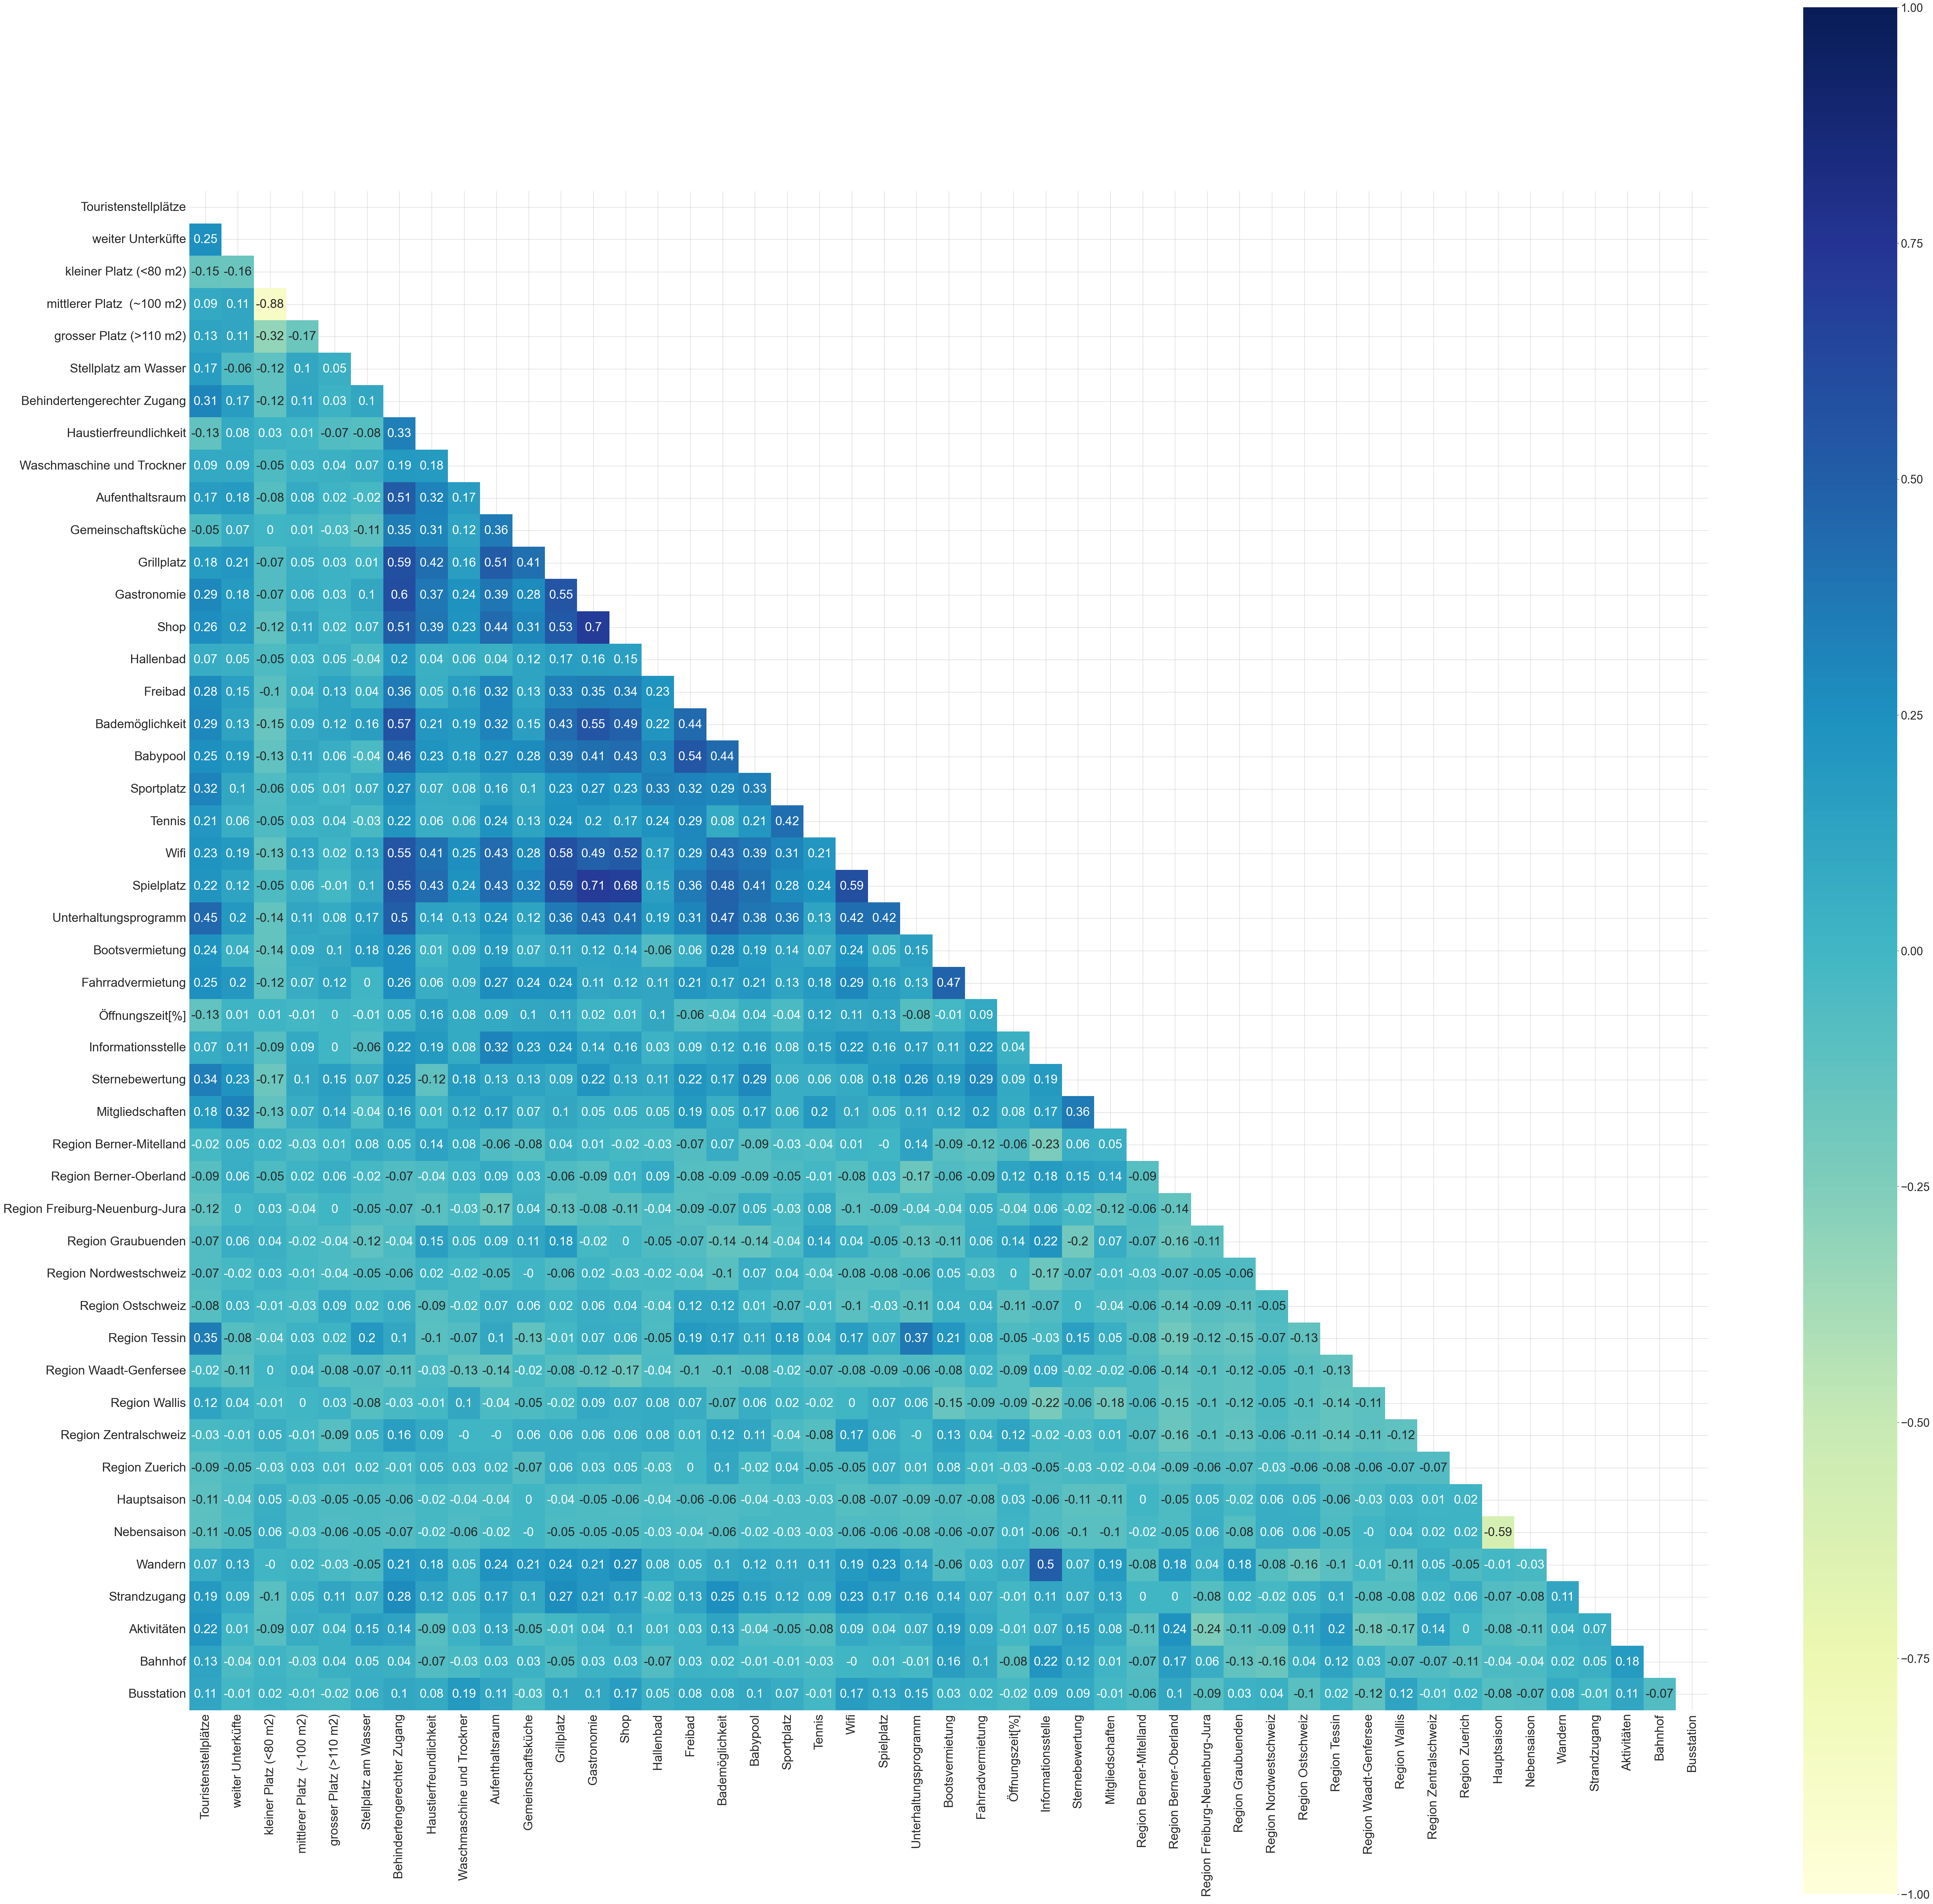

In [279]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
mask = np.zeros_like(df_correlation.corr())
mask[np.triu_indices_from(mask)] = True


# Heatmap zur Visualisierung der Korrelationen
plt.figure(figsize=(74, 74))
heatmap = sns.heatmap(df_correlation.corr().round(2), square=True, cmap='YlGnBu', vmin=-1, vmax=1, annot=True, annot_kws={'size': 27}, mask=mask)

# Schrift der Achsenbeschriftungen vergrössern
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=27)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=27)

# Schrift der Legende vergrössern
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=25)


plt.show()

In [280]:
# Korrelationsmatrix berechnen
corr_matrix = df_correlation.corr()

# Feature-Paare mit Korrelation >= 0.8 finden
high_correlation_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) >= 0.8:  # Hier wird der Betrag der Korrelation überprüft
            pair = (corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j])
            high_correlation_pairs.append(pair)

# Ausgabe der Feature-Paare mit hoher Korrelation
print("Feature-Paare mit Korrelation >= 0.8:")
for pair in high_correlation_pairs:
    print(pair)

Feature-Paare mit Korrelation >= 0.8:
('kleiner Platz (<80 m2)', 'mittlerer Platz  (~100 m2)', -0.8811639722752511)


Die RuntimeWarning: divide by zero encountered in scalar divide-Warnung tritt auf, weil der R²-Wert für eine der Variablen 1 ist, was bedeutet, dass diese Variable perfekt durch eine oder mehrere andere Variablen im Modell erklärt wird. Dies führt zu einem VIF von unendlich (inf).

Encoded-Daten können tatsächlich perfekte oder nahezu perfekte Multikollinearität aufweisen, insbesondere wenn sie durch One-Hot-Encoding oder Dummy-Variablen-Repräsentation erstellt wurden. Dies geschieht, weil die Summe der Dummy-Variablen einer kategorischen Variable immer konstant ist. Hier sind einige wichtige Punkte zu beachten:

Dummy-Variable-Falle
Die Dummy-Variable-Falle tritt auf, wenn man alle Dummy-Variablen einer kategorischen Variable in das Modell aufnimmt. Dies führt zu perfekter Multikollinearität, weil die Summe aller Dummy-Variablen immer 1 ist. Um dies zu vermeiden, lässt man typischerweise eine Dummy-Variable weg (Referenzkategorie).

Um dies zu vermeiden, lässt du eine Dummy-Variable weg. Hier: "kleiner Platz (<80 m2)", da diese Variable die grösste Korrelation hat mit den anderen zwei Stellplatzgrössen. Und "region_nordwestschweiz", weil diese am wenigsten Ausprägungen hat.


Random Forest und Gradient Boosting sind zwei Machine Learning Algorithmen, die in gewisser Weise mit Multikollinearität umgehen können, jedoch auf unterschiedliche Weise:

Random Forests
Random Forests sind robust gegenüber Multikollinearität aus folgenden Gründen:

1. Feature Sampling: Random Forests verwenden Zufallsauswahl von Features für jeden Baum im Ensemble. Dadurch werden die Bäume unterschiedliche Sätze von Features lernen, wodurch die Wichtigkeit einzelner korrelierter Features reduziert wird.

2. Entscheidungsbäume: Jeder Entscheidungsbaum im Random Forest betrachtet nur einen Teil der verfügbaren Features. Dadurch wird die Wahrscheinlichkeit verringert, dass ein Baum aufgrund von Multikollinearität übermäßig beeinflusst wird.

3. Ensemble Learning: Durch die Aggregation mehrerer Entscheidungsbäume im Random Forest wird das Rauschen, das durch Multikollinearität verursacht wird, reduziert. Das finale Vorhersagemodell profitiert davon, dass es sich aus verschiedenen Perspektiven auf die Daten lernt.

Gradient Boosting
Gradient Boosting Algorithmen, wie z.B. XGBoost oder LightGBM, können ebenfalls mit Multikollinearität umgehen, aber sie sind weniger robust als Random Forests:

1. Shrinkage und Regularisierung: Diese Techniken in Gradient Boosting Algorithmen helfen, Overfitting zu reduzieren, indem sie die Gewichtung von Features kontrollieren. Dies kann dazu beitragen, dass die Auswirkungen von Multikollinearität gemindert werden.

2. Feature Importance: Gradient Boosting Algorithmen berücksichtigen normalerweise die Wichtigkeit der Features während des Trainings. Dadurch werden weniger wichtige korrelierte Features möglicherweise weniger in das Modell einbezogen.

Einschränkungen und Best Practices
Trotz ihrer Fähigkeit, mit Multikollinearität umzugehen, gibt es Einschränkungen und Best Practices zu beachten:

- Interpretation der Feature Importance: Wenn Features hoch korreliert sind, kann die Interpretation der Feature Importance weniger eindeutig sein. Einige Modelle könnten einem der korrelierten Features eine höhere Wichtigkeit zuschreiben, während andere es niedriger bewerten.

- Vorsicht bei starken Korrelationen: Obwohl Random Forest und Gradient Boosting Algorithmen robust gegenüber Multikollinearität sind, können sehr starke Korrelationen zwischen Features immer noch zu Problemen führen, insbesondere wenn die Anzahl der Trainingsdaten begrenzt ist.

- Feature Selection und Preprocessing: Es kann dennoch sinnvoll sein, Features zu entfernen oder zu transformieren, um Multikollinearität zu reduzieren, bevor Sie sie einem Modell zuführen. Dies kann helfen, die Modellleistung zu verbessern und die Interpretierbarkeit zu erhöhen.

Insgesamt sind Random Forest und Gradient Boosting Algorithmen wegen ihrer internen Mechanismen zur Reduzierung von Overfitting und zur Robustheit gegenüber Multikollinearität beliebt. Es ist jedoch wichtig, die spezifischen Merkmale Ihrer Daten und die Modellanforderungen zu berücksichtigen, um die besten Ergebnisse zu erzielen.



In [282]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Unabhängige Variablen (Features)
X = df_correlation.drop(['Region Nordwestschweiz', 'kleiner Platz (<80 m2)' ], axis=1)

# Hinzufügen einer Konstanten für das Intercept
X = add_constant(X)

# Berechnung des VIF für jedes Feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data

,Feature,VIF
0,const,107.017473
1,Touristenstellplätze,2.056533
2,weiter Unterküfte,1.418872
3,mittlerer Platz (~100 m2),1.140484
4,grosser Platz (>110 m2),1.183011
5,Stellplatz am Wasser,1.227051
6,Behindertengerechter Zugang,2.691525
7,Haustierfreundlichkeit,1.841134
8,Waschmaschine und Trockner,1.241612
9,Aufenthaltsraum,1.930552
